In [5]:
pip install scipy==1.12


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.2 MB 1.7 MB/s eta 0:00:28
   ---------------------------------------- 0.1/46.2 MB 1.7 MB/s eta 0:00:27
   ---------------------------------------- 0.3/46.2 MB 2.2 MB/s eta 0:00:21
   ---------------------------------------- 0.5/46.2 MB 3.6 MB/s eta 0:00:13
    --------------------------------------- 0.6/46.2 MB 4.1 MB/s eta 0:00:12
    --------------------------------------- 1.1/46.2 MB 5.4 MB/s eta 0:00:09
    --------------------------------------- 1.1/46.2 MB 4.8 MB/s eta 0:00:10
   - 

  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
pip install gym[atari,accept-rom-license]==0.21

  Using cached gym-0.21.0-py3-none-any.whl
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 640.0 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
  Using cached AutoROM-0.4.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached ale_py-0.7.5-cp39-cp39-win_amd64.whl.metadata (8.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached AutoROM.accept_rom_license-0.6.1-py3-none-any.whl
Using cached ale_py-0.7.5-cp39-cp39-win_amd64.whl (935 kB)
Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 2.0 MB/s e

In [1]:
import scipy
scipy.__version__

'1.12.0'

In [3]:
import random
import numpy as np
import torch
import utils

In [4]:
device = 'cuda:0'

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ENV_NAME = "BreakoutNoFrameskip-v4"

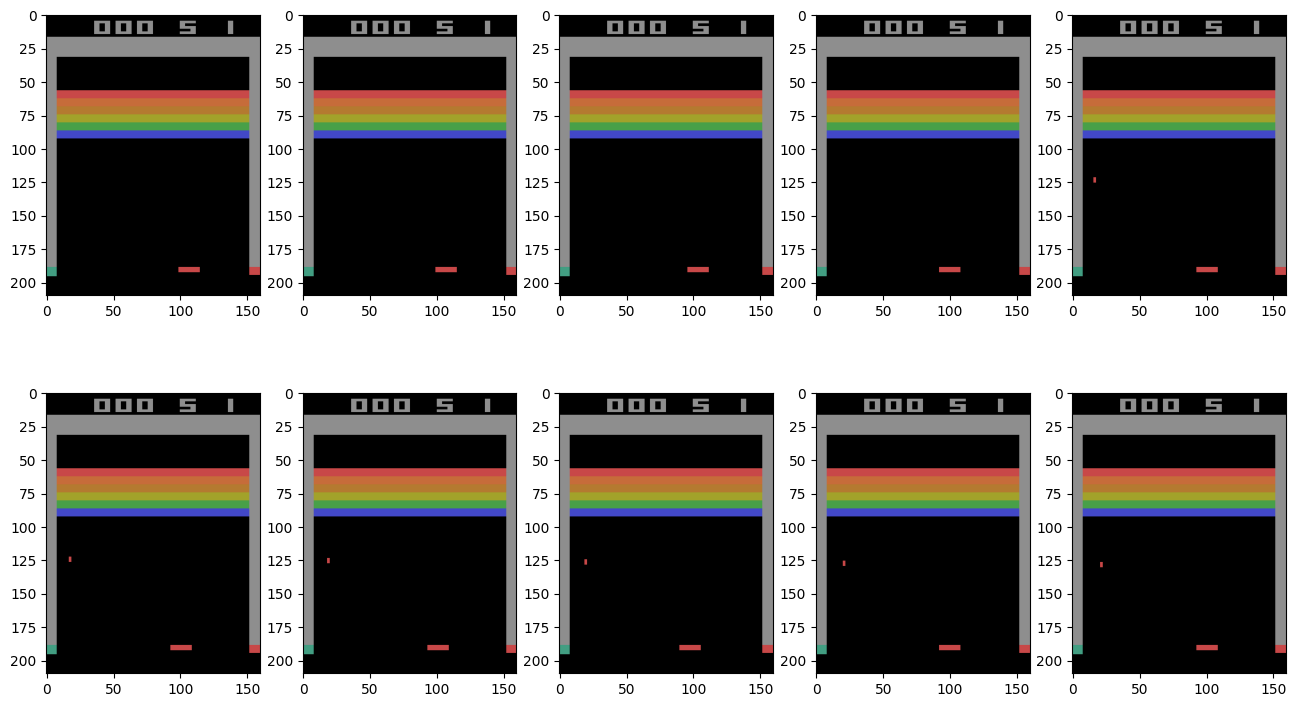

In [7]:
env = gym.make(ENV_NAME)
env.reset()

n_cols = 5
n_rows = 2
fig = plt.figure(figsize=(16, 9))

for row in range(n_rows):
    for col in range(n_cols):
        ax = fig.add_subplot(n_rows, n_cols, row * n_cols + col + 1)
        ax.imshow(env.render('rgb_array'))
        env.step(env.action_space.sample())
plt.show()

In [8]:
import pygame

pygame 2.3.0 (SDL 2.24.2, Python 3.9.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
state = env.step(env.action_space.sample())[0]
state.shape

(210, 160, 3)

In [10]:
from PIL import Image
from matplotlib import cm
im = Image.fromarray(state)
im = im.crop((0, 29, 0, 210))

In [11]:
im = im.resize((64, 64))

In [12]:
im_n = np.array(im)
im_n[:, : , 0].shape

(64, 64)

In [13]:
from gym.core import ObservationWrapper
from gym.spaces import Box


class PreprocessAtariObs(ObservationWrapper):
    def __init__(self, env):
        """A gym wrapper that crops, scales image into the desired shapes and grayscales it."""
        ObservationWrapper.__init__(self, env)

        self.img_size = (1, 64, 64)
        self.observation_space = Box(0.0, 1.0, self.img_size)


    def _to_gray_scale(self, rgb, channel_weights=[0.8, 0.1, 0.1]):
        return rgb[:,:,0] * channel_weights[0] + rgb[:,:,1] * channel_weights[1] + rgb[:,:,2] * channel_weights[2]


    def observation(self, img):
        """what happens to each observation"""

        # Here's what you need to do:
        #  * crop image, remove irrelevant parts
        #  * resize image to self.img_size
        #     (Use imresize from any library you want,
        #      e.g. opencv, PIL, keras. Don't use skimage.imresize
        #      because it is extremely slow.)
        #  * cast image to grayscale
        #  * convert image pixels to (0,1) range, float32 type
        img = Image.fromarray(img)
        img = img.crop((6, 29, 160 - 6, 210))
        img = img.resize((64, 64))
        img = np.array(img).astype(np.float32)
        img = (img - img.min()) / (img.max() - img.min())
        img = self._to_gray_scale(img)
        return img[np.newaxis, :]

Formal tests seem fine. Here's an example of what you'll get.


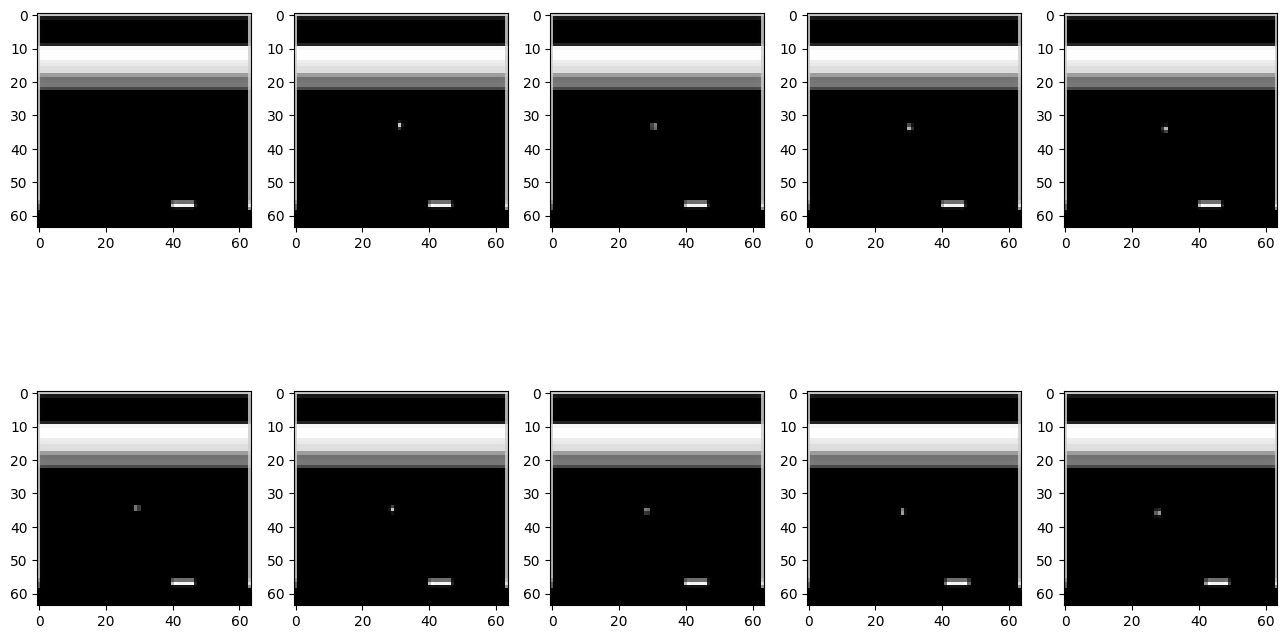

In [13]:
import gym
# spawn game instance for tests
env = gym.make(ENV_NAME)  # create raw env
env = PreprocessAtariObs(env)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
env.reset()
obs, _, _, _ = env.step(env.action_space.sample())

# test observation
assert obs.ndim == 3, "observation must be [channel, h, w] even if there's just one channel"
assert obs.shape == observation_shape, obs.shape
assert obs.dtype == 'float32'
assert len(np.unique(obs)) > 2, "your image must not be binary"
assert 0 <= np.min(obs) and np.max(
    obs) <= 1, "convert image pixels to [0,1] range"

assert np.max(obs) >= 0.5, "It would be easier to see a brighter observation"
assert np.mean(obs) >= 0.1, "It would be easier to see a brighter observation"

print("Formal tests seem fine. Here's an example of what you'll get.")

n_cols = 5
n_rows = 2
fig = plt.figure(figsize=(16, 9))
obs = env.reset()
for row in range(n_rows):
    for col in range(n_cols):
        ax = fig.add_subplot(n_rows, n_cols, row * n_cols + col + 1)
        ax.imshow(obs[0, :, :], interpolation='none', cmap='gray')
        obs, _, _, _ = env.step(env.action_space.sample())
plt.show()

In [14]:
import atari_wrappers

def PrimaryAtariWrap(env, clip_rewards=True):
    assert 'NoFrameskip' in env.spec.id

    # This wrapper holds the same action for <skip> frames and outputs
    # the maximal pixel value of 2 last frames (to handle blinking
    # in some envs)
    env = atari_wrappers.MaxAndSkipEnv(env, skip=4)

    # This wrapper sends done=True when each life is lost
    # (not all the 5 lives that are givern by the game rules).
    # It should make easier for the agent to understand that losing is bad.
    env = atari_wrappers.EpisodicLifeEnv(env)

    # This wrapper laucnhes the ball when an episode starts.
    # Without it the agent has to learn this action, too.
    # Actually it can but learning would take longer.
    env = atari_wrappers.FireResetEnv(env)

    # This wrapper transforms rewards to {-1, 0, 1} according to their sign
    if clip_rewards:
        env = atari_wrappers.ClipRewardEnv(env)

    # This wrapper is yours :)
    env = PreprocessAtariObs(env)
    return env

In [15]:
from framebuffer import FrameBuffer

def make_env(clip_rewards=True, seed=None):
    env = gym.make(ENV_NAME)  # create raw env
    if seed is not None:
        env.seed(seed)
    env = PrimaryAtariWrap(env, clip_rewards)
    env = FrameBuffer(env, n_frames=4, dim_order='pytorch')
    return env

env = make_env()
env.reset()
n_actions = env.action_space.n
state_shape = env.observation_space.shape

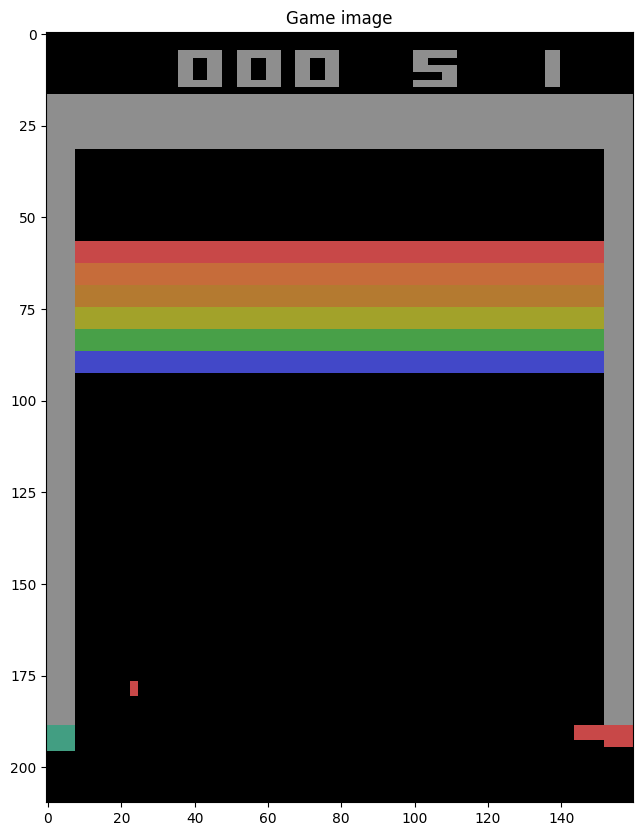

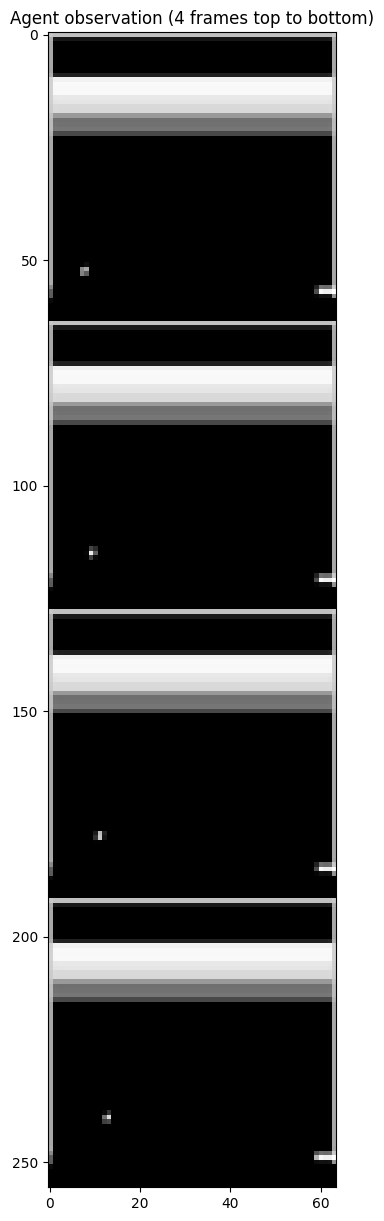

In [16]:
for _ in range(12):
    obs, _, _, _ = env.step(env.action_space.sample())

plt.figure(figsize=[12,10])
plt.title("Game image")
plt.imshow(env.render("rgb_array"))
plt.show()

plt.figure(figsize=[15,15])
plt.title("Agent observation (4 frames top to bottom)")
plt.imshow(utils.img_by_obs(obs, state_shape), cmap='gray')
plt.show()

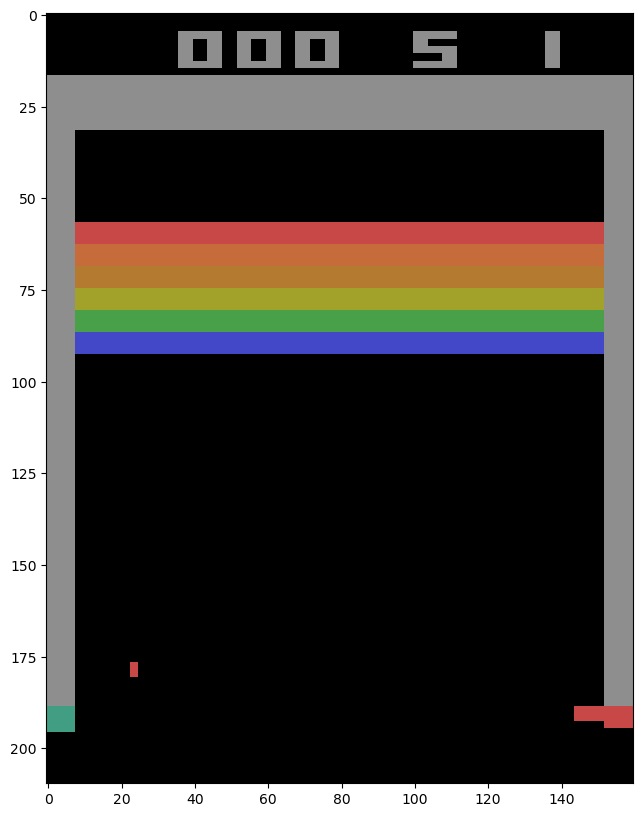

In [23]:
plt.figure(figsize=[12,10])
plt.imshow(env.render("rgb_array"))
plt.show()

In [24]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/diplik/anaconda3/envs/RL_atari_17/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

In [17]:
import torch
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:
def conv2d_size_out(size, kernel_size, stride):
    """
    common use case:
    cur_layer_img_w = conv2d_size_out(cur_layer_img_w, kernel_size, stride)
    cur_layer_img_h = conv2d_size_out(cur_layer_img_h, kernel_size, stride)
    to understand the shape for dense layer's input
    """
    return (size - (kernel_size - 1) - 1) // stride  + 1

In [27]:
conv2d_size_out(7, 3, 3)

2

In [28]:
device = 'cuda:0' if torch.cuda.is_available else 'cpu'
device

'cuda:0'

In [19]:
a = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, stride=2)
b = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2)
c = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
net = nn.Sequential(a,b,c).to(device)
s = env.reset()
states = torch.tensor([s], device=device, dtype=torch.float32).to(device)
net(states).shape

C:\Users\Seva\AppData\Local\Temp\ipykernel_8596\3159358709.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:277.)
  states = torch.tensor([s], device=device, dtype=torch.float32).to(device)


torch.Size([1, 64, 7, 7])

In [20]:
import torch.nn as nn
import math

class DQNAgent(nn.Module):
    def __init__(self, state_shape, n_actions, epsilon=0):

        super().__init__()
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.state_shape = state_shape
        
        # shared encoder
        self.conv1 = nn.Conv2d(in_channels=state_shape[0], out_channels=16, kernel_size=3, stride=2)
        self.ReLU1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2)
        self.ReLU2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
        self.ReLU3 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fe = nn.Sequential(self.conv1, self.ReLU1, self.conv2, self.ReLU2,
                                 self.conv3, self.ReLU3, self.flatten)
        
        # V
        self.fc_V = nn.Linear(49 * 64, 1024)
        self.fc_V_2 = nn.Linear(1024, 1)
        self.ReLuV = nn.ReLU()
        
        # A
        self.fc_A = nn.Linear(49 * 64, 1024)
        self.fc_A_2 = nn.Linear(1024, n_actions)
        self.ReLuA = nn.ReLU()
        
    def forward(self, state_t):
        """
        takes agent's observation (tensor), returns qvalues (tensor)
        :param state_t: a batch of 4-frame buffers, shape = [batch_size, 4, h, w]
        """
        # Use your network to compute qvalues for given state
        features = self.fe(state_t)
        
        V = self.fc_V(features)
        V = self.ReLuV(V)
        V = self.fc_V_2(V)
        
        A = self.fc_A(features)
        A = self.ReLuA(A)
        A = self.fc_A_2(A)
        
        qvalues = V + A - torch.mean(A, dim=1, keepdim=True)
        assert qvalues.requires_grad, "qvalues must be a torch tensor with grad"
        assert (
            len(qvalues.shape) == 2 and 
            qvalues.shape[0] == state_t.shape[0] and 
            qvalues.shape[1] == n_actions
        )

        return qvalues

    def get_qvalues(self, states):
        """
        like forward, but works on numpy arrays, not tensors
        """
        model_device = next(self.parameters()).device
        states = torch.tensor(states, device=model_device, dtype=torch.float32)
        qvalues = self.forward(states)
        return qvalues.data.cpu().numpy()

    def sample_actions(self, qvalues):
        """pick actions given qvalues. Uses epsilon-greedy exploration strategy. """
        epsilon = self.epsilon
        batch_size, n_actions = qvalues.shape

        random_actions = np.random.choice(n_actions, size=batch_size)
        best_actions = qvalues.argmax(axis=-1)

        should_explore = np.random.choice(
            [0, 1], batch_size, p=[1-epsilon, epsilon])
        return np.where(should_explore, random_actions, best_actions)

In [21]:
agent = DQNAgent(state_shape, n_actions, epsilon=0.5).to(device)

In [22]:
def evaluate(env, agent, n_games=1, greedy=False, t_max=10000):
    """ Plays n_games full games. If greedy, picks actions as argmax(qvalues). Returns mean reward. """
    rewards = []
    for _ in range(n_games):
        s = env.reset()
        reward = 0
        for _ in range(t_max):
            qvalues = agent.get_qvalues([s])
            action = qvalues.argmax(axis=-1)[0] if greedy else agent.sample_actions(qvalues)[0]
            s, r, done, _ = env.step(action)
            reward += r
            if done:
                break

        rewards.append(reward)
    return np.mean(rewards)

In [23]:
evaluate(env, agent, n_games=1)

0.0

In [87]:
import random
from collections import deque

class ReplayBuffer(object):
    def __init__(self, size):
        """
        Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.

        Note: for this assignment you can pick any data structure you want.
              If you want to keep it simple, you can store a list of tuples of (s, a, r, s') in self._storage
              However you may find out there are faster and/or more memory-efficient ways to do so.
        """
        self._storage = deque()
        self._maxsize = size

        # OPTIONAL: YOUR CODE

    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize. 
        Make sure, FIFO rule is being followed: the oldest examples has to be removed earlier
        '''
        data = (obs_t, action, reward, obs_tp1, done)

        if self.__len__() == self._maxsize:
            self._storage.popleft()
            
        self._storage.append(data)

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """
        idxes = np.random.choice(np.arange(self.__len__()), batch_size)
        
        # collect <s,a,r,s',done> for each index
        #print((self._storage[0][5]))
        #print((np.array([self._storage[i][0] for i in idxes])).shape)
        #batch = np.array([self._storage[i] for i in idxes])
        obs_batch = np.array([self._storage[i][0] for i in idxes])
        act_batch = np.array([self._storage[i][1] for i in idxes])
        rew_batch = np.array([self._storage[i][2] for i in idxes])
        next_obs_batch = np.array([self._storage[i][3] for i in idxes])
        done_mask = np.array([self._storage[i][4] for i in idxes])
        
        return obs_batch, act_batch, rew_batch, next_obs_batch, done_mask
        #if self.__len__() == 1 and batch_size == 1:
            #return self._storage[0]
        
        # return (batch[:, i] for i in range(batch.shape[1]))
        #return (np.stack(batch[:, i]) for i in range(batch.shape[1]))

In [88]:
# from replay_buffer import ReplayBuffer
exp_replay = ReplayBuffer(10)

for _ in range(30):
    exp_replay.add(env.reset(), env.action_space.sample(), 1.0, env.reset(), done=False)

obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(5)

assert len(exp_replay) == 10, "experience replay size should be 10 because that's what maximum capacity is"

In [89]:
def play_and_record(initial_state, agent, env, exp_replay, n_steps=1):
    """
    Play the game for exactly n_steps, record every (s,a,r,s', done) to replay buffer. 
    Whenever game ends, add record with done=True and reset the game.
    It is guaranteed that env has done=False when passed to this function.

    PLEASE DO NOT RESET ENV UNLESS IT IS "DONE"

    :returns: return sum of rewards over time and the state in which the env stays
    """
    s = initial_state
    sum_rewards = 0
    for i in range(n_steps):
        qvalues = agent.get_qvalues([s])
        action = agent.sample_actions(qvalues)[0]
        next_s, r, done, _ = env.step(action)
        sum_rewards += r
        exp_replay.add(s, action, r, next_s, done)
        if done:
            s = env.reset()
        else:
            s = next_s
        
    return sum_rewards, s

In [90]:
obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(10)

In [85]:
np.stack(obs_batch).shape

(10, 4, 64, 64)

In [91]:
# testing your code.
exp_replay = ReplayBuffer(2000)

state = env.reset()
play_and_record(state, agent, env, exp_replay, n_steps=1000)

# if you're using your own experience replay buffer, some of those tests may need correction.
# just make sure you know what your code does
assert len(exp_replay) == 1000, \
    "play_and_record should have added exactly 1000 steps, " \
    "but instead added %i" % len(exp_replay)
is_dones = list(zip(*exp_replay._storage))[-1]

assert 0 < np.mean(is_dones) < 0.1, \
    "Please make sure you restart the game whenever it is 'done' and " \
    "record the is_done correctly into the buffer. Got %f is_done rate over " \
    "%i steps. [If you think it's your tough luck, just re-run the test]" % (
        np.mean(is_dones), len(exp_replay))

for _ in range(100):
    obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(10)
    assert obs_batch.shape == next_obs_batch.shape == (10,) + state_shape
    assert act_batch.shape == (10,), \
        "actions batch should have shape (10,) but is instead %s" % str(act_batch.shape)
    assert reward_batch.shape == (10,), \
        "rewards batch should have shape (10,) but is instead %s" % str(reward_batch.shape)
    assert is_done_batch.shape == (10,), \
        "is_done batch should have shape (10,) but is instead %s" % str(is_done_batch.shape)
    assert [int(i) in (0, 1) for i in is_dones], \
        "is_done should be strictly True or False"
    assert [0 <= a < n_actions for a in act_batch], "actions should be within [0, n_actions)"

print("Well done!")

Well done!


In [92]:
target_network = DQNAgent(agent.state_shape, agent.n_actions, epsilon=0.5).to(device)
# This is how you can load weights from agent into target network
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

In [93]:
def compute_td_loss(states, actions, rewards, next_states, is_done,
                    agent, target_network,
                    gamma=0.99,
                    check_shapes=False,
                    device=device):
    """ Compute td loss using torch operations only. Use the formulae above. """
    states = torch.tensor(states, device=device, dtype=torch.float32)    # shape: [batch_size, *state_shape]
    actions = torch.tensor(actions, device=device, dtype=torch.int64)    # shape: [batch_size]
    rewards = torch.tensor(rewards, device=device, dtype=torch.float32)  # shape: [batch_size]
    # shape: [batch_size, *state_shape]
    next_states = torch.tensor(next_states, device=device, dtype=torch.float)
    is_done = torch.tensor(
        is_done.astype('float32'),
        device=device,
        dtype=torch.float32,
    )  # shape: [batch_size]
    is_not_done = 1 - is_done

    # get q-values for all actions in current states
    predicted_qvalues = agent(states)  # shape: [batch_size, n_actions]

    # compute q-values for all actions in next states

    predicted_next_qvalues = target_network(next_states)  # shape: [batch_size, n_actions]
    
    # select q-values for chosen actions
    predicted_qvalues_for_actions = predicted_qvalues[range(len(actions)), actions]  # shape: [batch_size]

    # compute V*(next_states) using predicted next q-values
    # DOUBLE DQN:
    qvalues_argmax = torch.argmax(predicted_qvalues.detach(), dim=1)
    next_state_values = predicted_next_qvalues[range(len(actions)), qvalues_argmax]

    assert next_state_values.dim() == 1 and next_state_values.shape[0] == states.shape[0], \
        "must predict one value per state"

    # compute "target q-values" for loss - it's what's inside square parentheses in the above formula.
    # at the last state use the simplified formula: Q(s,a) = r(s,a) since s' doesn't exist
    # you can multiply next state values by is_not_done to achieve this.
    target_qvalues_for_actions = rewards + gamma * next_state_values
    target_qvalues_for_actions = torch.where(is_not_done.type(torch.bool), target_qvalues_for_actions, rewards)

    # mean squared error loss to minimize
    loss = torch.mean((predicted_qvalues_for_actions - target_qvalues_for_actions.detach()) ** 2)

    if check_shapes:
        assert predicted_next_qvalues.data.dim() == 2, \
            "make sure you predicted q-values for all actions in next state"
        assert next_state_values.data.dim() == 1, \
            "make sure you computed V(s') as maximum over just the actions axis and not all axes"
        assert target_qvalues_for_actions.data.dim() == 1, \
            "there's something wrong with target q-values, they must be a vector"

    return loss

In [94]:
obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(10)

loss = compute_td_loss(obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch,
                       agent, target_network,
                       gamma=0.99, check_shapes=True)
loss.backward()

assert loss.requires_grad and tuple(loss.data.size()) == (), \
    "you must return scalar loss - mean over batch"
assert np.any(next(agent.parameters()).grad.data.cpu().numpy() != 0), \
    "loss must be differentiable w.r.t. network weights"
assert np.all(next(target_network.parameters()).grad is None), \
    "target network should not have grads"

In [95]:
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [96]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [97]:
env = make_env(seed)
state_shape = env.observation_space.shape
n_actions = env.action_space.n
state = env.reset()

agent = DQNAgent(state_shape, n_actions, epsilon=1).to(device)
target_network = DQNAgent(state_shape, n_actions).to(device)
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

In [126]:
REPLAY_BUFFER_SIZE = 10**4
N_STEPS = 100

exp_replay = ReplayBuffer(REPLAY_BUFFER_SIZE)
for i in trange(REPLAY_BUFFER_SIZE // N_STEPS):
    if not utils.is_enough_ram(min_available_gb=0.1):
        print("""
            Less than 100 Mb RAM available. 
            Make sure the buffer size in not too huge.
            Also check, maybe other processes consume RAM heavily.
            """
             )
        break
    play_and_record(state, agent, env, exp_replay, n_steps=N_STEPS)
    if len(exp_replay) == REPLAY_BUFFER_SIZE:
        break
print(len(exp_replay))

 99%|█████████▉| 99/100 [01:28<00:00,  1.12it/s]

10000


In [135]:
timesteps_per_epoch = 1
batch_size = 16
total_steps = 4 * 10**5
decay_steps = 10**4

opt = torch.optim.Adam(agent.parameters(), lr=1e-4)

init_epsilon = 1
final_epsilon = 0.1

loss_freq = 50
refresh_target_network_freq = 5000
eval_freq = 5000

max_grad_norm = 50

n_lives = 5

In [136]:
mean_rw_history = []
td_loss_history = []
grad_norm_history = []
initial_state_v_history = []

step = 0

In [137]:
import time

def wait_for_keyboard_interrupt():
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        pass

buffer size = 10000, epsilon = 0.10000


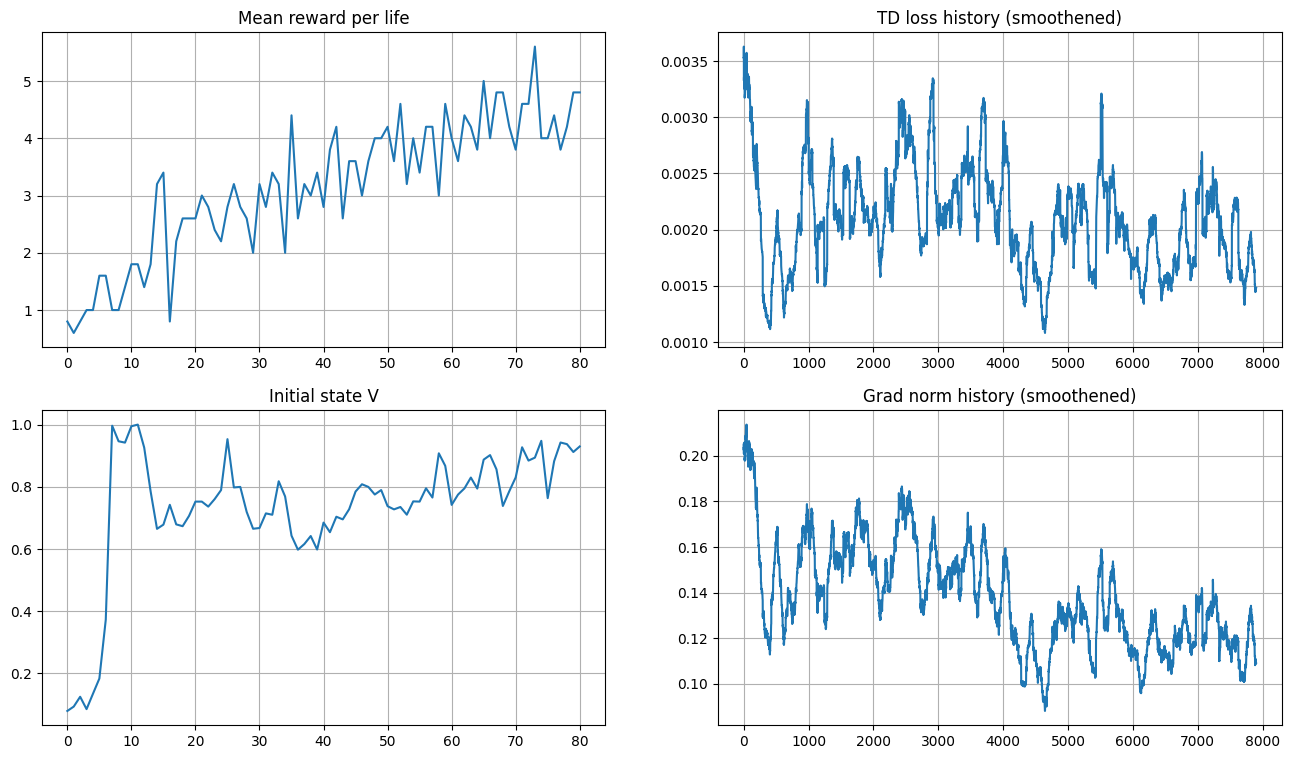

100%|██████████| 400001/400001 [11:20:14<00:00,  9.80it/s]


In [138]:
state = env.reset()
with trange(step, total_steps + 1) as progress_bar:
    for step in progress_bar:
        if not utils.is_enough_ram():
            print('less that 100 Mb RAM available, freezing')
            print('make sure everything is ok and use KeyboardInterrupt to continue')
            wait_for_keyboard_interrupt()

        agent.epsilon = utils.linear_decay(init_epsilon, final_epsilon, step, decay_steps)

        # play
        _, state = play_and_record(state, agent, env, exp_replay, timesteps_per_epoch)

        # train
        batch = exp_replay.sample(batch_size)
        loss = compute_td_loss(*batch, agent, target_network)

        loss.backward()
        grad_norm = nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
        opt.step()
        opt.zero_grad()

        if step % loss_freq == 0:
            td_loss_history.append(loss.data.cpu().item())
            grad_norm_history.append(grad_norm.cpu())

        if step % refresh_target_network_freq == 0:
            # Load agent weights into target_network
            target_network.load_state_dict(agent.state_dict())

        if step % eval_freq == 0:
            mean_rw_history.append(evaluate(
                make_env(clip_rewards=True, seed=step), agent, n_games=3 * n_lives, greedy=True)
            )
            initial_state_q_values = agent.get_qvalues(
                [make_env(seed=step).reset()]
            )
            initial_state_v_history.append(np.max(initial_state_q_values))

            clear_output(True)
            print("buffer size = %i, epsilon = %.5f" %
                (len(exp_replay), agent.epsilon))

            plt.figure(figsize=[16, 9])

            plt.subplot(2, 2, 1)
            plt.title("Mean reward per life")
            plt.plot(mean_rw_history)
            plt.grid()

            assert not np.isnan(td_loss_history[-1])
            plt.subplot(2, 2, 2)
            plt.title("TD loss history (smoothened)")
            plt.plot(utils.smoothen(td_loss_history))
            plt.grid()

            plt.subplot(2, 2, 3)
            plt.title("Initial state V")
            plt.plot(initial_state_v_history)
            plt.grid()

            plt.subplot(2, 2, 4)
            plt.title("Grad norm history (smoothened)")
            plt.plot(utils.smoothen(grad_norm_history))
            plt.grid()
   
            plt.show()

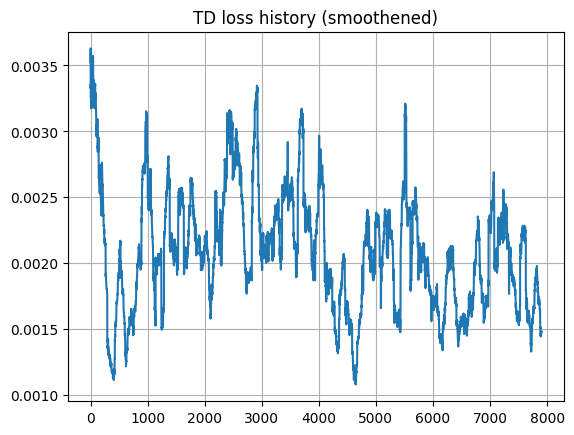

In [139]:
torch.save(agent.state_dict(), 'dddqn2.pt')

In [115]:
agent.load_state_dict(torch.load('dddqn.pt'))

<All keys matched successfully>

In [140]:
final_score = evaluate(
  make_env(clip_rewards=False, seed=9),
    agent, n_games=30, greedy=True, t_max=10 * 1000
)
print('final score:', final_score)
assert final_score >= 3, 'not as cool as DQN can'
print('Cool!')

final score: 7.8
Cool!


In [141]:
# Record sessions

import gym.wrappers

with gym.wrappers.Monitor(make_env(), directory="videos", force=True) as env_monitor:
    sessions = [evaluate(env_monitor, agent, n_games=n_lives, greedy=True) for _ in range(10)]

In [142]:
for s in Path('videos').iterdir():
    print(s.suffix)

.json
.json


In [143]:
# Show video. This may not work in some setups. If it doesn't
# work for you, you can download the videos and view them locally.
import sys
from pathlib import Path
from base64 import b64encode
from IPython.display import HTML

video_paths = sorted([s for s in Path('videos').iterdir() if s.suffix == '.mp4'])
video_path = video_paths[-1]  # You can also try other indices

if 'google.colab' in sys.modules:
    # https://stackoverflow.com/a/57378660/1214547
    with video_path.open('rb') as fp:
        mp4 = fp.read()
    data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
else:
    data_url = str(video_path)

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format(data_url))

IndexError: list index out of range

In [165]:
eval_env = make_env(clip_rewards=False)
record = utils.play_and_log_episode(eval_env, agent)
total_reward = np.sum(record['rewards'])
print('total reward for life:', total_reward)
for key in record:
    print(key)

total reward for life: 7.0
states
v_mc
v_agent
q_spreads
td_errors
rewards
episode_finished


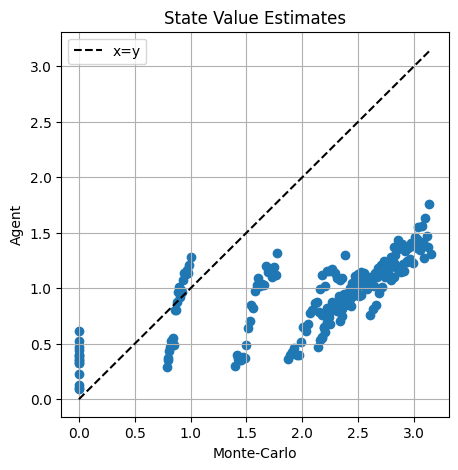

In [164]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

eval_env_clipped = make_env(clip_rewards=True)
record_clipped = utils.play_and_log_episode(eval_env_clipped, agent)

ax.scatter(record_clipped['v_mc'], record_clipped['v_agent'])
ax.plot(sorted(record_clipped['v_mc']), sorted(record_clipped['v_mc']),
       'black', linestyle='--', label='x=y')

ax.grid()
ax.legend()
ax.set_title('State Value Estimates')
ax.set_xlabel('Monte-Carlo')
ax.set_ylabel('Agent')

plt.show()

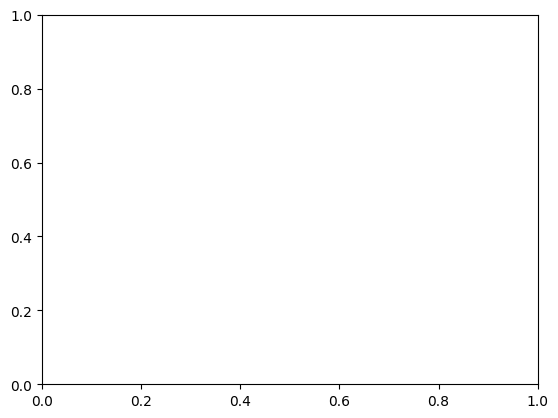

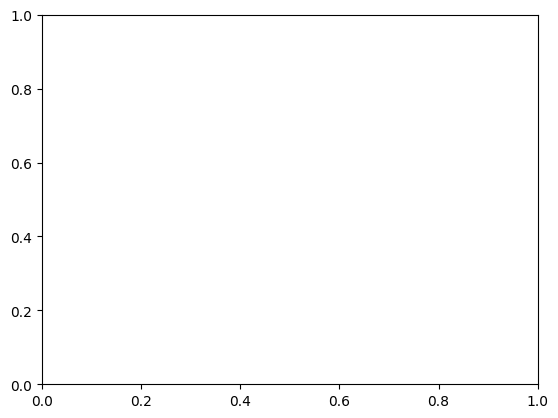

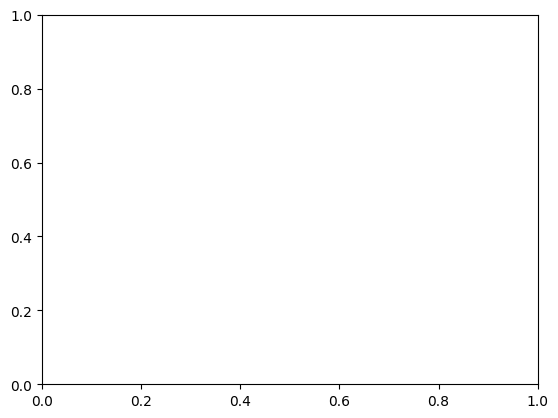

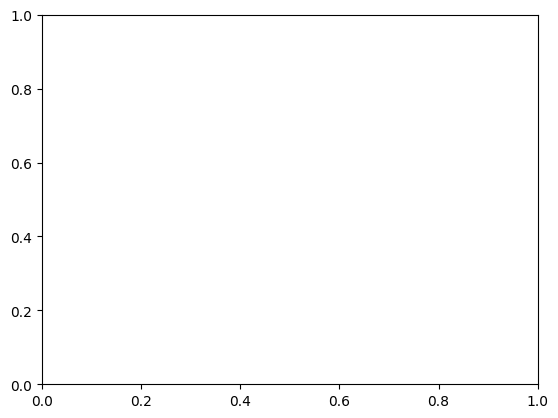

In [230]:
fig1, ax1 = plt.subplots()
ax.plot(mean_rw_history)
ax.set_title("Mean reward per life")
ax.grid()

fig2, ax2 = plt.subplots()
ax.plot(utils.smoothen(td_loss_history))
ax.set_title("TD loss history (smoothened)")
ax.grid()

fig3, ax3 = plt.subplots()
ax.plot(initial_state_v_history)
ax.set_title("Initial state V")
ax.grid()

fig4, ax4 = plt.subplots()
ax.plot(utils.smoothen(grad_norm_history))
ax.set_title("Grad norm history (smoothened)")
ax.grid()

In [180]:
import mlflow
from mlflow.models import infer_signature

In [181]:
#import os
#os.environ['GIT_PYTHON_GIT_EXECUTABLE'] = r'C:\Users\Seva\AppData\Local\GitHubDesktop\GitHubDesktop.exe'

mlflow.set_tracking_uri('file:///C:/Users/Seva/Desktop/%D0%9D%D0%BE%D0%B2%D0%B0%D1%8F%20%D0%BF%D0%B0%D0%BF%D0%BA%D0%B0%20%282%29/mlruns/0/5423995c46ab4605931a11531a0ba276/artifacts')
mlflow.set_experiment("MLflow Breakout")

In [229]:
with mlflow.start_run() as run:
    mlflow.log_metrics({"total_reward": total_reward})
    mlflow.log_figure(fig, "State Value Estimates.png")
    mlflow.log_figure(fig1, "Mean reward per life.png")
    mlflow.log_figure(fig2, "TD loss history (smoothened).png")
    mlflow.log_figure(fig3, "Initial state V.png")
    mlflow.log_figure(fig4, "Grad norm history (smoothened).png")
    